<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Yasamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Yasamal" supermarketidagi savdo holati


In [83]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [84]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Yasamal.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,IYNE DEST 12-LI PAKE,To'qimachilik,0.45,2019-08-16,True
1,ATENA 500GR BEYAZ PENDIR PL/Q,Pishloqlar,4.65,2019-08-16,True
2,RASIMOGLU 600GR DUSBERE PAKET,Un mahsulotlari,7.70,2019-08-16,True
3,NAS MOLOCNIK 200GR KRESTYANSKOYE KERE YAGI 72.6%,Yog'lar,3.20,2019-08-16,True
4,PANASONIC 4AD BATAREYKA SIZE S LR03APB/4BP,Batareya,4.75,2019-08-16,True
5,CIF KREM 500ML CAMASIR SUYU KATKILI,"Yuvish vositalari, tozalagichlar",3.95,2019-08-16,True
6,ABSERON SERAB 0.5LT BLACK JACK VISKI,"Viski, tekila va h.k",8.50,2019-08-16,True
7,GROSIK 10M ALYUMINEVAYA FOLQA,Maishiy buyumlar,2.25,2019-03-19,True
8,ELLE&VIRE 250GR KERE YAGI 82% DUZSUZ,Yog'lar,6.80,2019-03-19,True
9,FANTA 2LT DUSHES,Gazli ichimliklar,1.48,2019-03-19,True


In [85]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824 entries, 0 to 20823
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20824 non-null  object 
 1   mahsulot_turi   20824 non-null  object 
 2   mahsulot_narhi  20824 non-null  float64
 3   sotilgan_vaqti  20824 non-null  object 
 4   bonus_karta     20824 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 671.2+ KB


In [86]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [87]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824 entries, 0 to 20823
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20824 non-null  object        
 1   mahsulot_turi   20824 non-null  object        
 2   mahsulot_narhi  20824 non-null  float64       
 3   sotilgan_vaqti  20824 non-null  datetime64[ns]
 4   bonus_karta     20824 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 671.2+ KB


In [88]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2344
2068
1917
1737
2178
2154
2030
2217
2059
2109
11
0


In [89]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2344
2068
1917
1737
2178
2154
2030
2217
2059
2109
0
0


In [90]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,IYNE DEST 12-LI PAKE,To'qimachilik,0.45,2019-08-16,True
1,ATENA 500GR BEYAZ PENDIR PL/Q,Pishloqlar,4.65,2019-08-16,True
2,RASIMOGLU 600GR DUSBERE PAKET,Un mahsulotlari,7.70,2019-08-16,True
3,NAS MOLOCNIK 200GR KRESTYANSKOYE KERE YAGI 72.6%,Yog'lar,3.20,2019-08-16,True
4,PANASONIC 4AD BATAREYKA SIZE S LR03APB/4BP,Batareya,4.75,2019-08-16,True
...,...,...,...,...,...
20819,SAM ISIQLI,Bayram uchun aksessuarlar,0.90,2019-08-09,False
20820,DOMIK V DEREVNE 950ML SUD 1.5% T/P,Sut,2.21,2019-08-09,False
20821,ATENA 500GR KEND QATIGI 1.5%,Qatiq,1.27,2019-01-02,False
20822,AZOVSKAYA 250GR XALVA PODSOLNECNAYA,Shirinliklar,1.05,2019-01-02,False


In [91]:
#9 2019-yilda "Yasamal" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4717
Maishiy buyumlar,1139
"Yuvish vositalari, tozalagichlar",1061
Mevali sharbatlar,1014
Idish-tovoq,818
...,...
Kefir,18
Tayyor ovqatlar,13
Shampan,11
Suzma,10


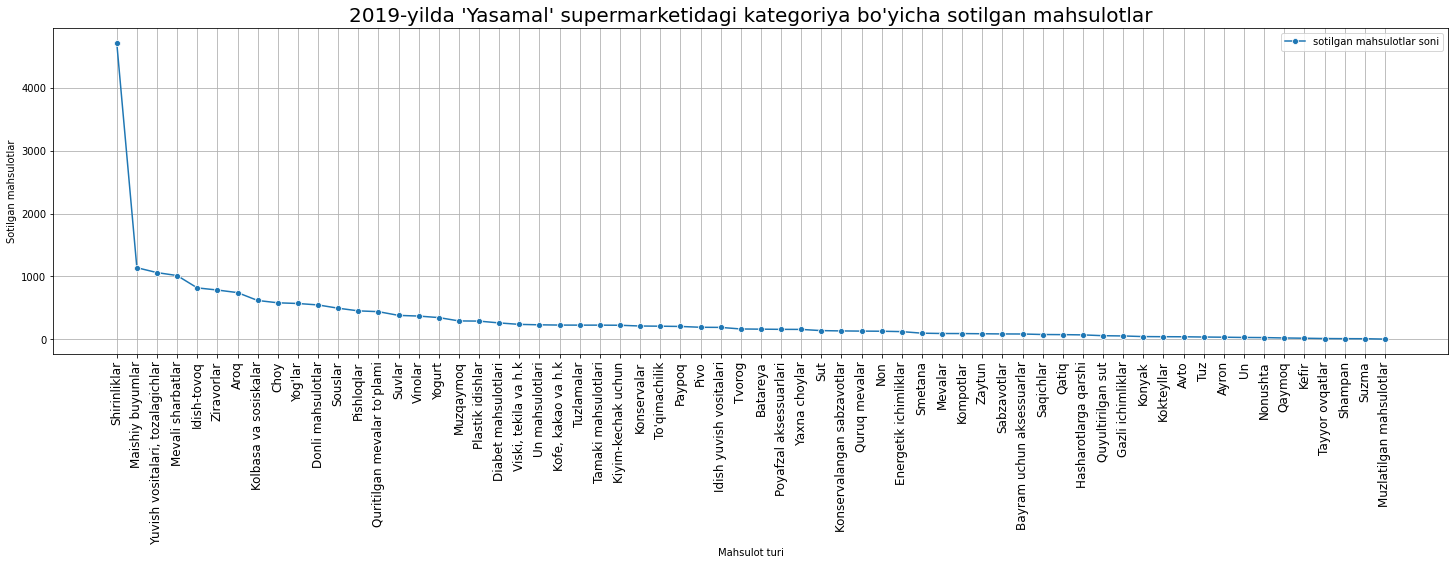

In [92]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Yasamal' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [93]:
#10 2019-yilda "Yasamal" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11782.19
Avto,223.88
Ayron,25.50
Batareya,654.43
Bayram uchun aksessuarlar,243.68
...,...
Yog'lar,4993.21
Yogurt,417.43


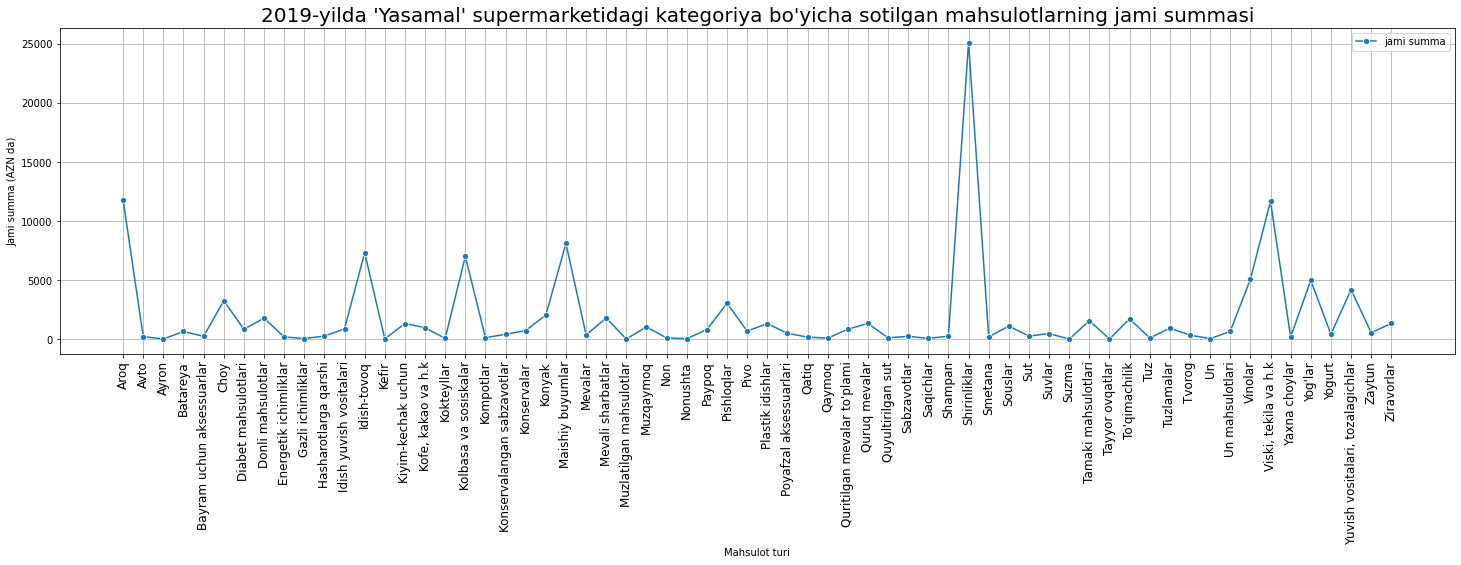

In [94]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Yasamal' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [95]:
#11 2019-yilda "Yasamal" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10653,10160


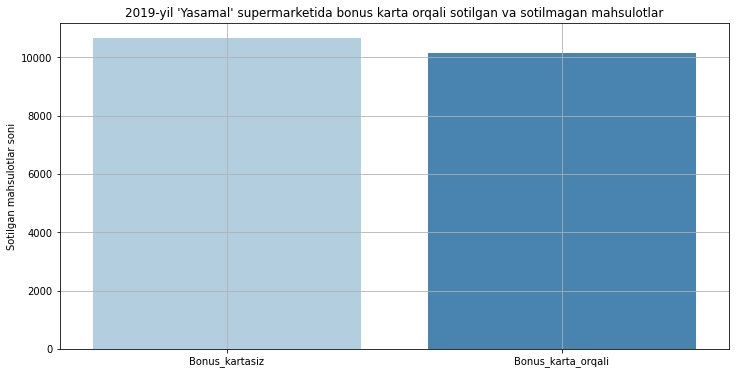

In [96]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Yasamal' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [97]:
#12 2019-yilda "Yasamal" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2344
Fevral,2068
Mart,1917
Aprel,1737
May,2178
Iyun,2154
Iyul,2030
Avgust,2217
Sentabr,2059
Oktabr,2109


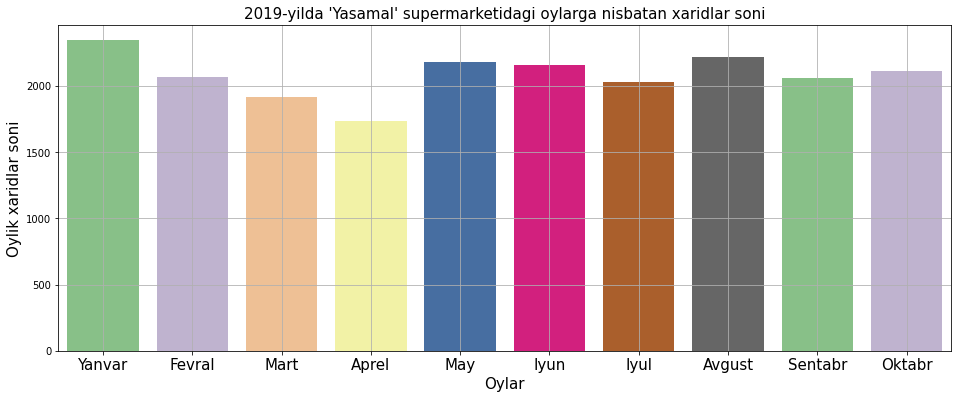

In [98]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Yasamal' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [99]:
#13 2019-yilda "Yasamal" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2949
Seshanba,2898
Chorshanba,2921
Payshanba,3128
Juma,3057
Shanba,3051
Yakshanba,2809


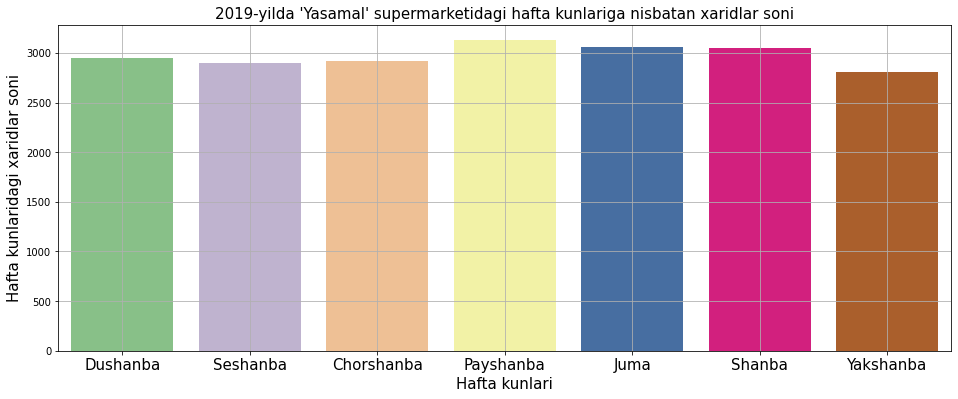

In [100]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Yasamal' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [101]:
#14 2019-yilda "Yasamal" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,769
2,844
3,671
4,659
5,583
6,605
7,681
8,655
9,800
10,698


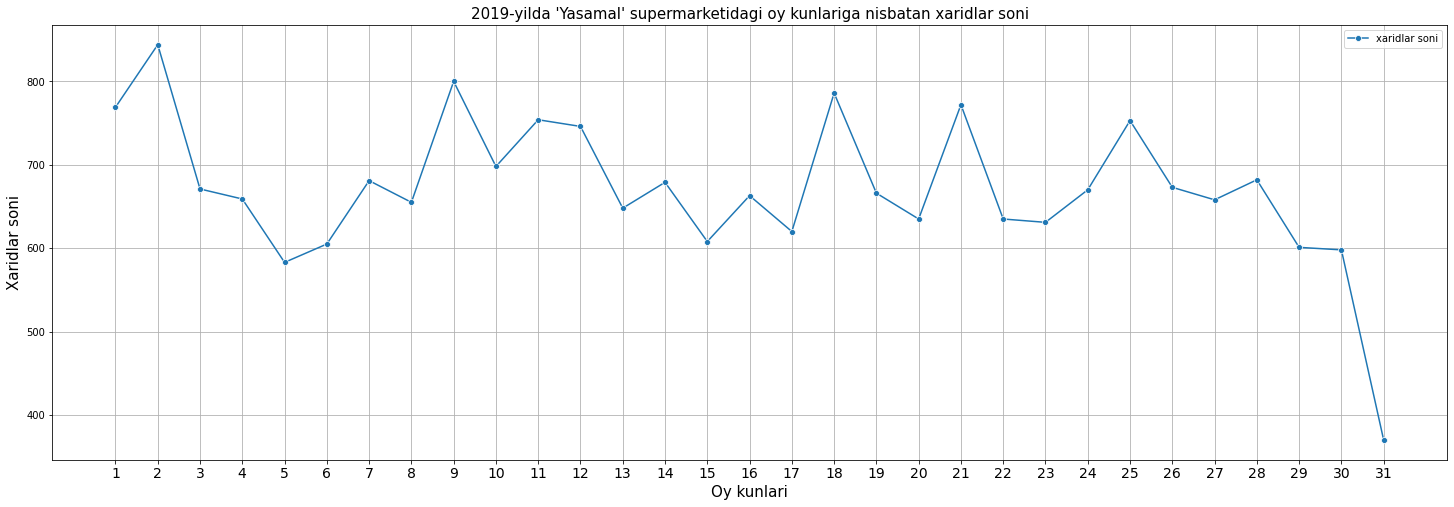

In [102]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Yasamal' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [103]:
#15 2019-yil 'Yasamal' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [104]:
len(oy_sanalari)

310

In [105]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [106]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [107]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,88,101,45,62,51,77,67,49,88,114,94,76,83,70,71,78,63,93,93,39,96,89,107,75,75,58,38,95,68,74,67
Fevral,72,84,72,57,56,73,87,38,132,82,90,38,115,107,54,106,47,55,44,101,70,50,77,62,63,80,98,58,0,0,0
Mart,76,67,61,49,45,41,48,76,66,45,71,90,41,50,92,52,32,83,66,48,74,45,69,62,77,53,74,68,66,76,54
Aprel,41,84,84,61,75,45,26,65,35,34,68,87,44,54,70,42,41,100,49,82,93,55,40,34,74,50,56,34,65,49,0
May,56,102,65,81,94,51,116,79,82,61,80,60,74,62,62,54,101,79,93,68,43,81,32,86,51,54,76,69,69,42,55
Iyun,45,114,76,84,70,80,87,85,72,77,86,119,57,75,49,73,92,76,41,36,75,48,74,73,102,70,31,75,62,50,0
Iyul,124,78,62,81,53,72,56,41,63,52,102,47,70,81,57,42,28,97,84,48,93,85,42,34,98,59,59,39,56,67,60
Avgust,91,85,105,71,39,52,89,71,119,80,55,74,48,44,50,90,74,56,53,76,62,54,42,79,107,55,69,65,55,132,75
Sentabr,85,71,33,67,64,45,49,93,68,77,50,71,41,69,34,62,62,69,89,64,92,84,72,90,38,102,112,99,48,59,0
Oktabr,91,58,68,46,36,69,56,58,75,76,58,84,75,67,69,64,80,78,54,73,74,44,76,75,68,92,45,80,112,49,59


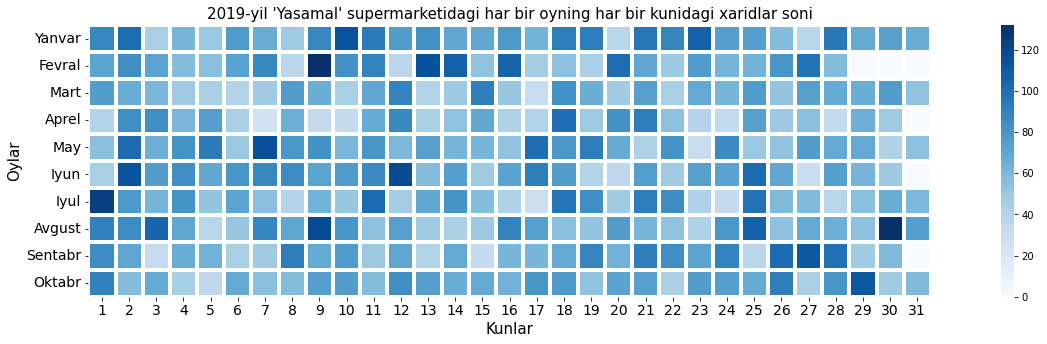

In [108]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Yasamal' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

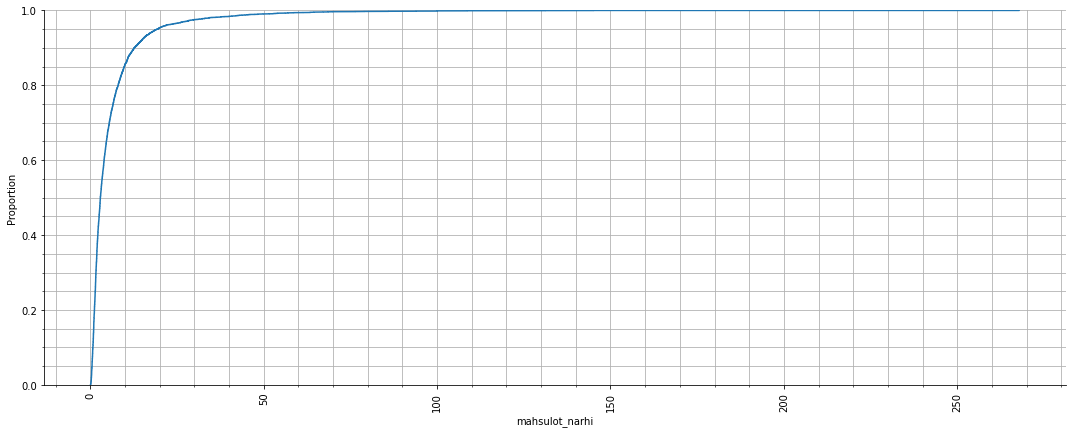

In [109]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()